# Basic HBA SST plot 

In [1]:
#from tangostationcontrol.statistics_writer.statistics_writer import main
from sst_bst_2 import SSTs
import sys
import numpy as np
import matplotlib.pyplot as plt
from time import sleep
from datetime import datetime

In [2]:
TILES=6
hba_si_nr=5
input_label = [ f'HBA_{cnt//2}Y' if cnt%2 else f'HBA_{cnt//2}X' for cnt in range(2*TILES)]
print(input_label)

['HBA_0X', 'HBA_0Y', 'HBA_1X', 'HBA_1Y', 'HBA_2X', 'HBA_2Y', 'HBA_3X', 'HBA_3Y', 'HBA_4X', 'HBA_4Y', 'HBA_5X', 'HBA_5Y']


In [3]:
sis=range(24,36,1); #signal inputs
print(sis)
START_TIME="2022-11-25 12:00:00"
#START_TIME="2022-11-26 00:00:00"
END_TIME=  "2022-11-28 00:00:00"
tstep_min=10;
#bands=range(512) #all bands

range(25, 37)


In [4]:
filename="HBA_%s_%imin.npy"%(START_TIME,tstep_min)
sst=SSTs('sst', band='HBA') #sst directoty
if False:
    tstart=datetime.fromisoformat(START_TIME) 
    tend  =datetime.fromisoformat(END_TIME)
    sst.getData_percentile(tstart,tend,sis,60*tstep_min) 
    print(sst.D.shape)
    np.save(filename,sst.D)
else:
    sst.D=np.load(filename)
    print(sst.D.shape)

(360, 12, 512)


In [5]:
freqs=200-np.arange(512)/512*100
freq1=160;i1=np.argmin(np.abs(freqs-freq1))
freq2=160;i2=np.argmin(np.abs(freqs-freq2))
freq3=160;i3=np.argmin(np.abs(freqs-freq3))
#print(i2,i1,freqs[i1],freqs[i2])

In [6]:
sst.input_label = input_label
sst.START_TIME = START_TIME

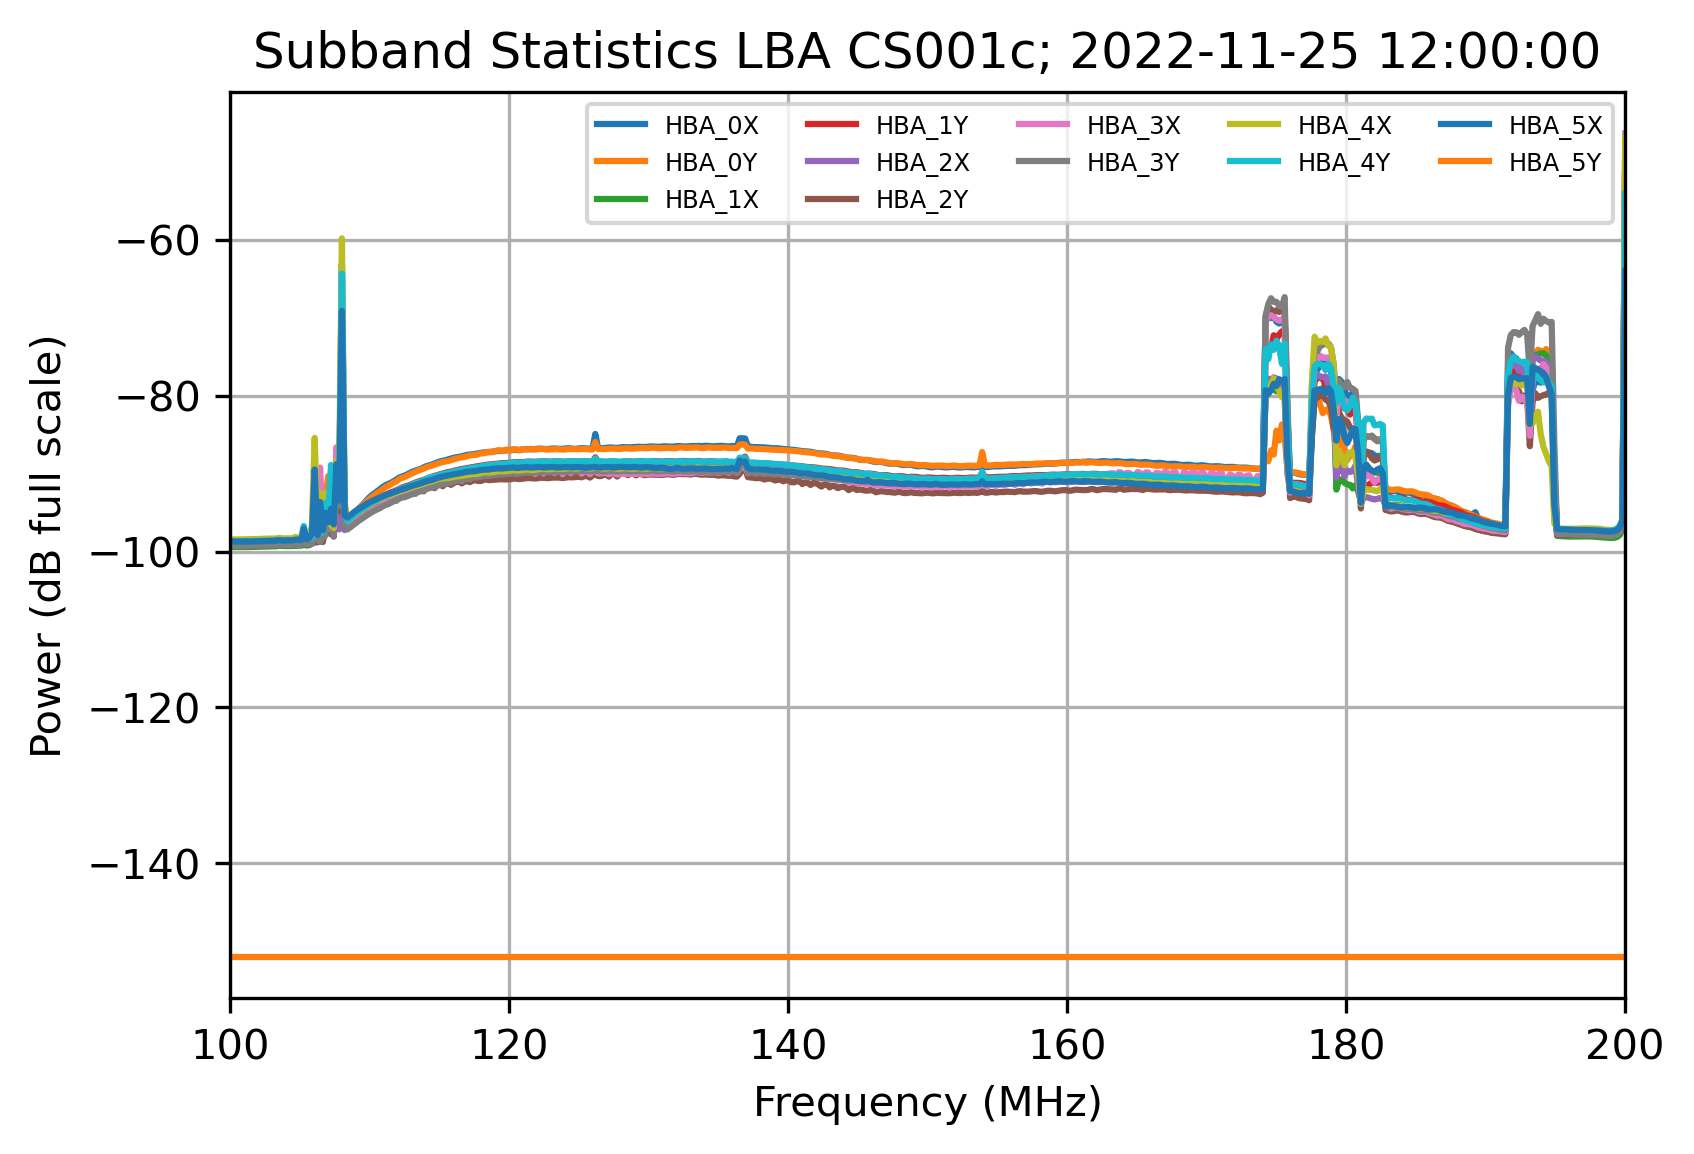

In [7]:
sst.plot_sst_frequency()

/data/L2TS_c6/sst_bst_2.py:177: RuntimeWarning: divide by zero encountered in log10
  Pwr=(10*np.log10(self.D[:,1::2,i]))-self.GainADC
/data/L2TS_c6/sst_bst_2.py:178: RuntimeWarning: invalid value encountered in subtract
  Pwr-=np.mean(Pwr,axis=0)[np.newaxis,:]


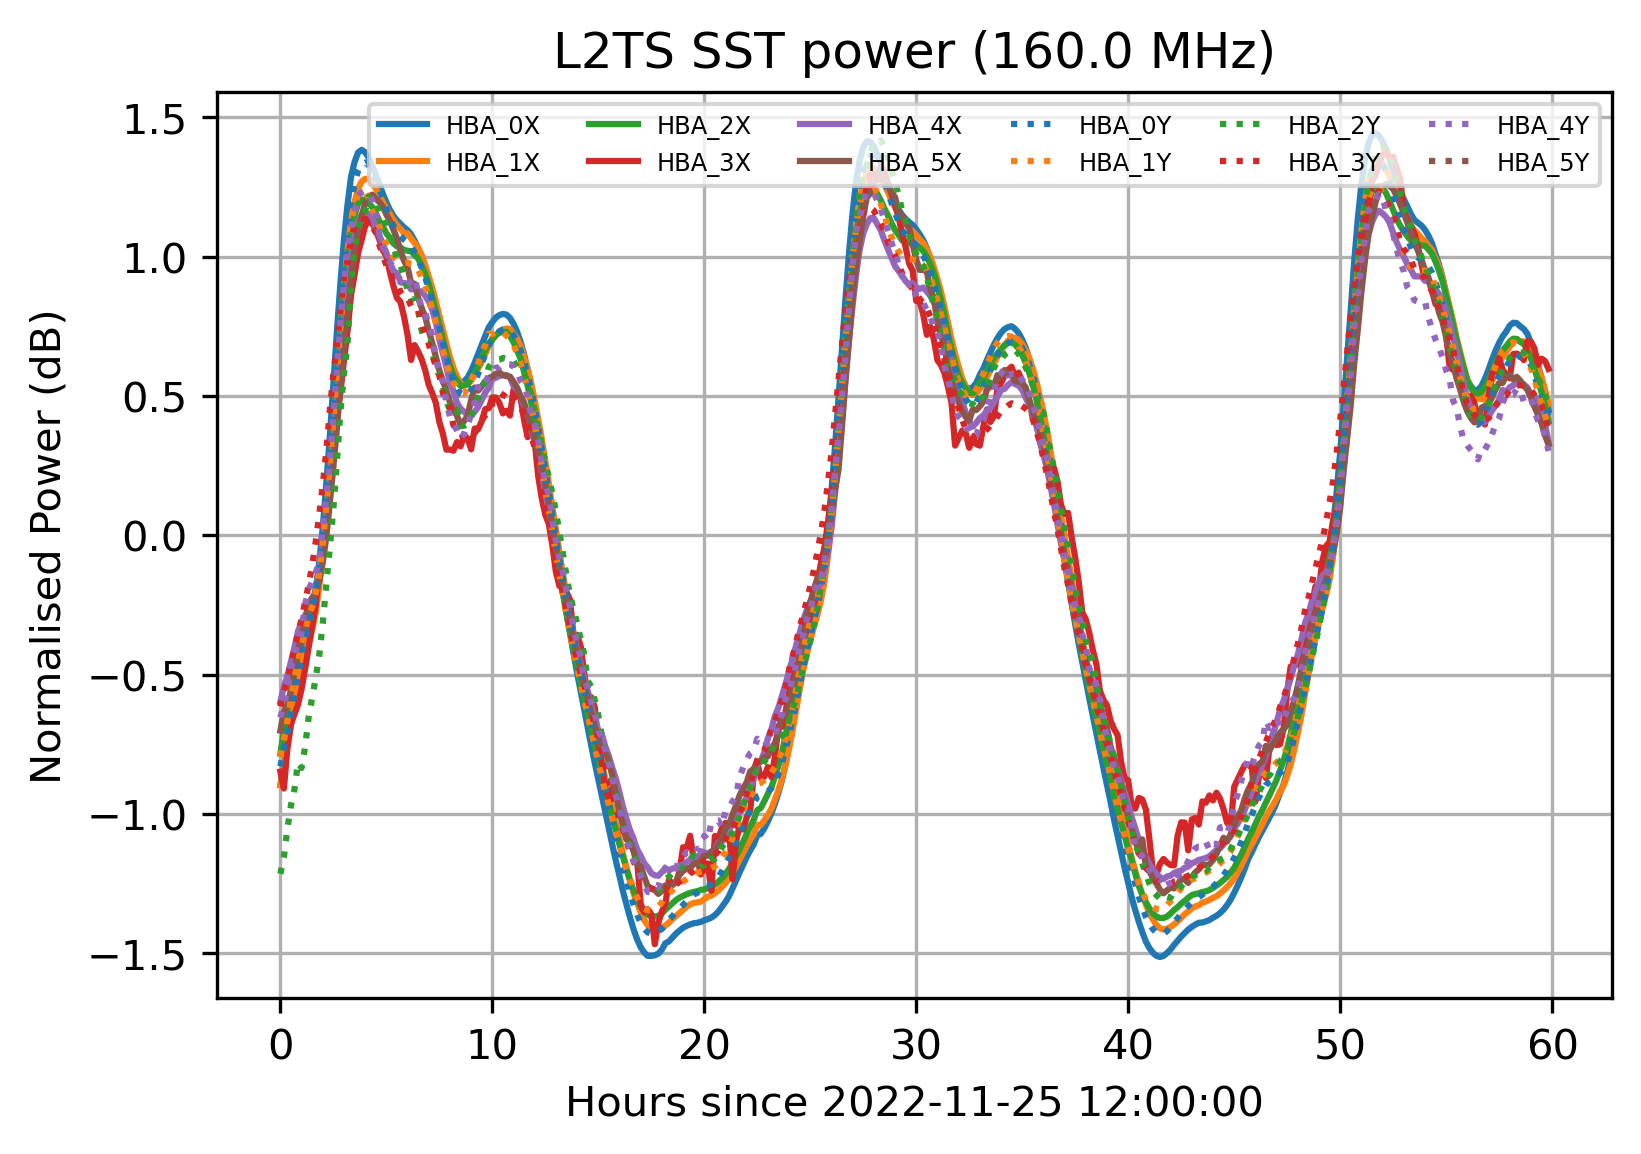

In [8]:
sst.plot_sst_time(f_measurement = 160)

[-95, -85]


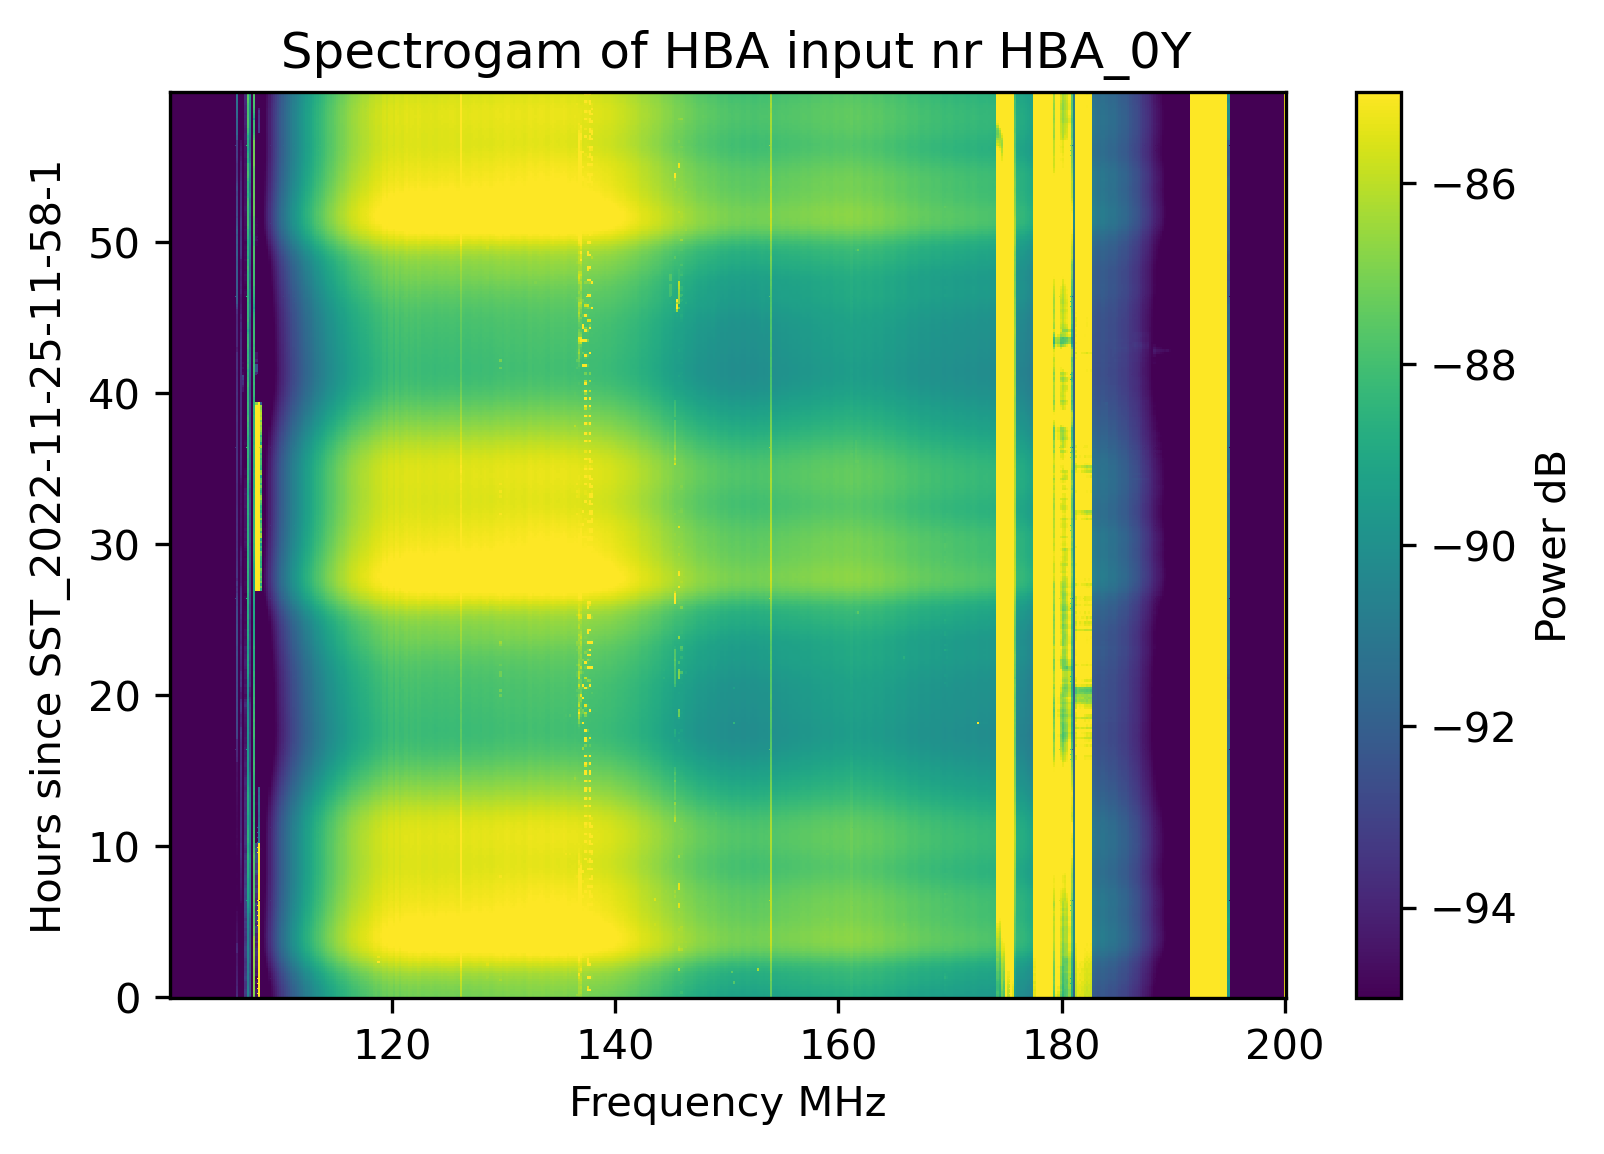

In [12]:
sst.plot_sst_waterfall(clim=[-95, -85])

None


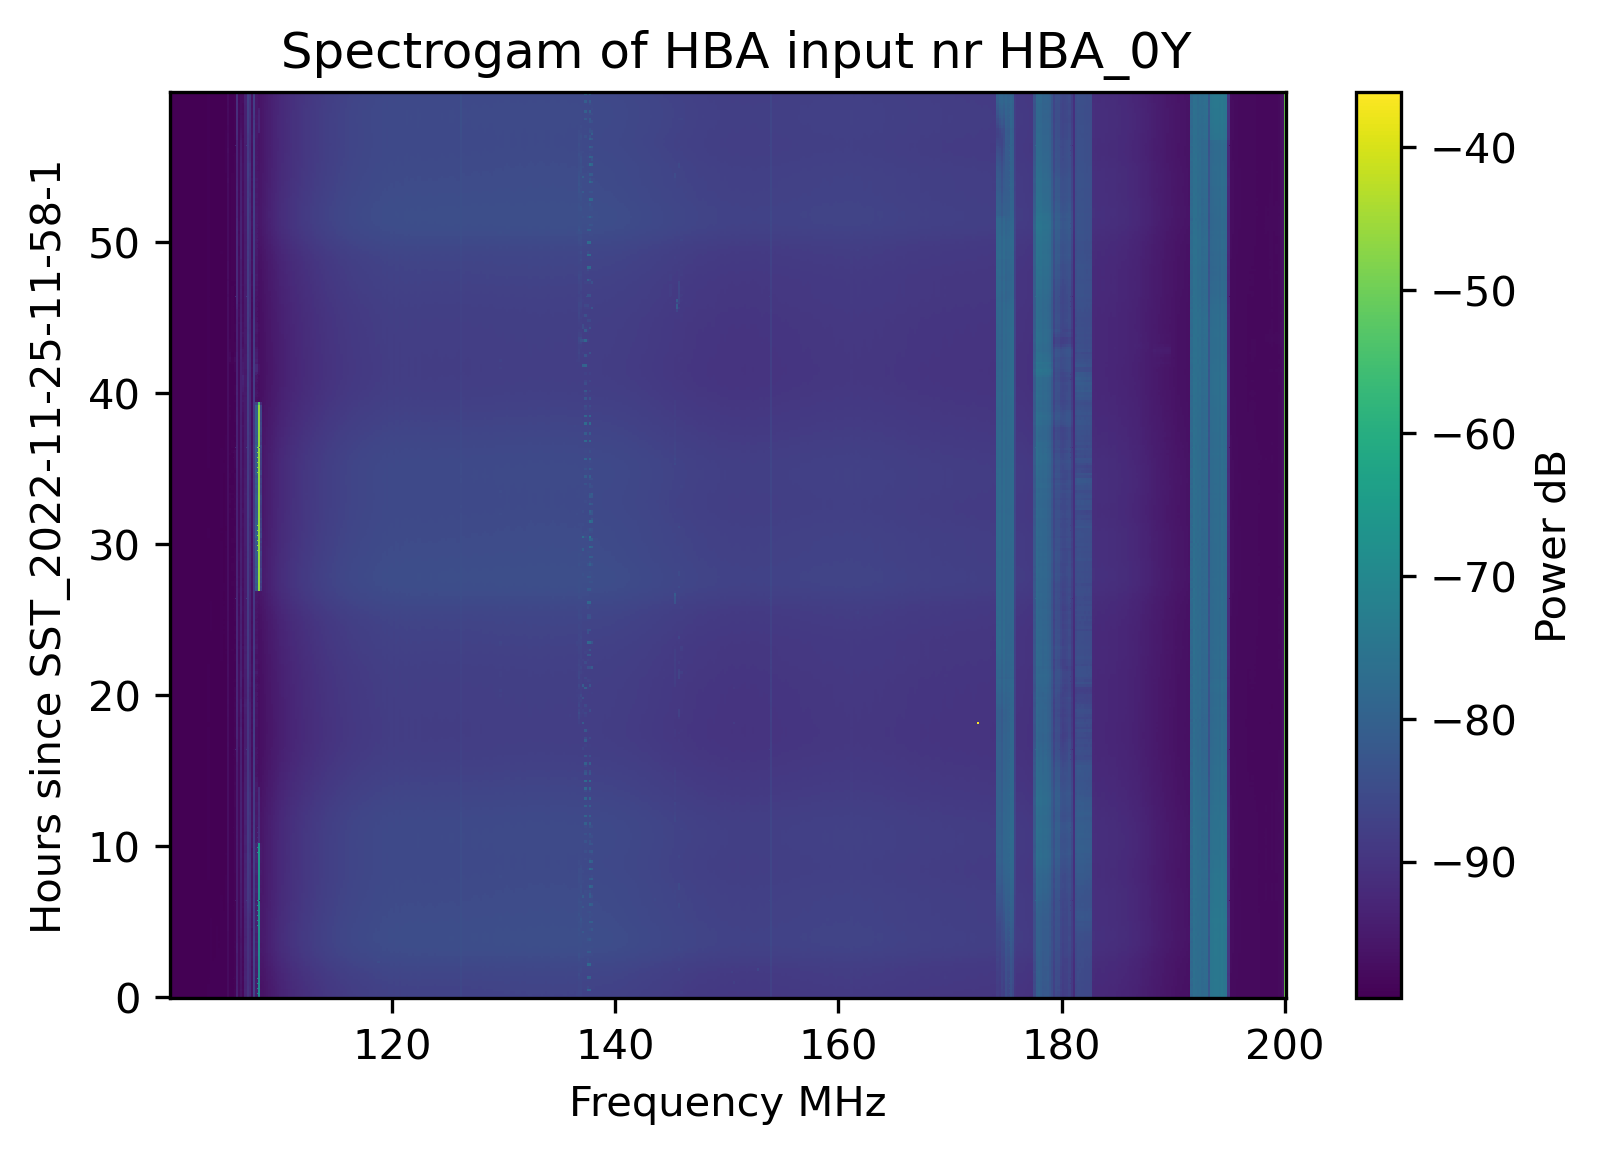

In [10]:
sst.plot_sst_waterfall()

# Import and setup data

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  re

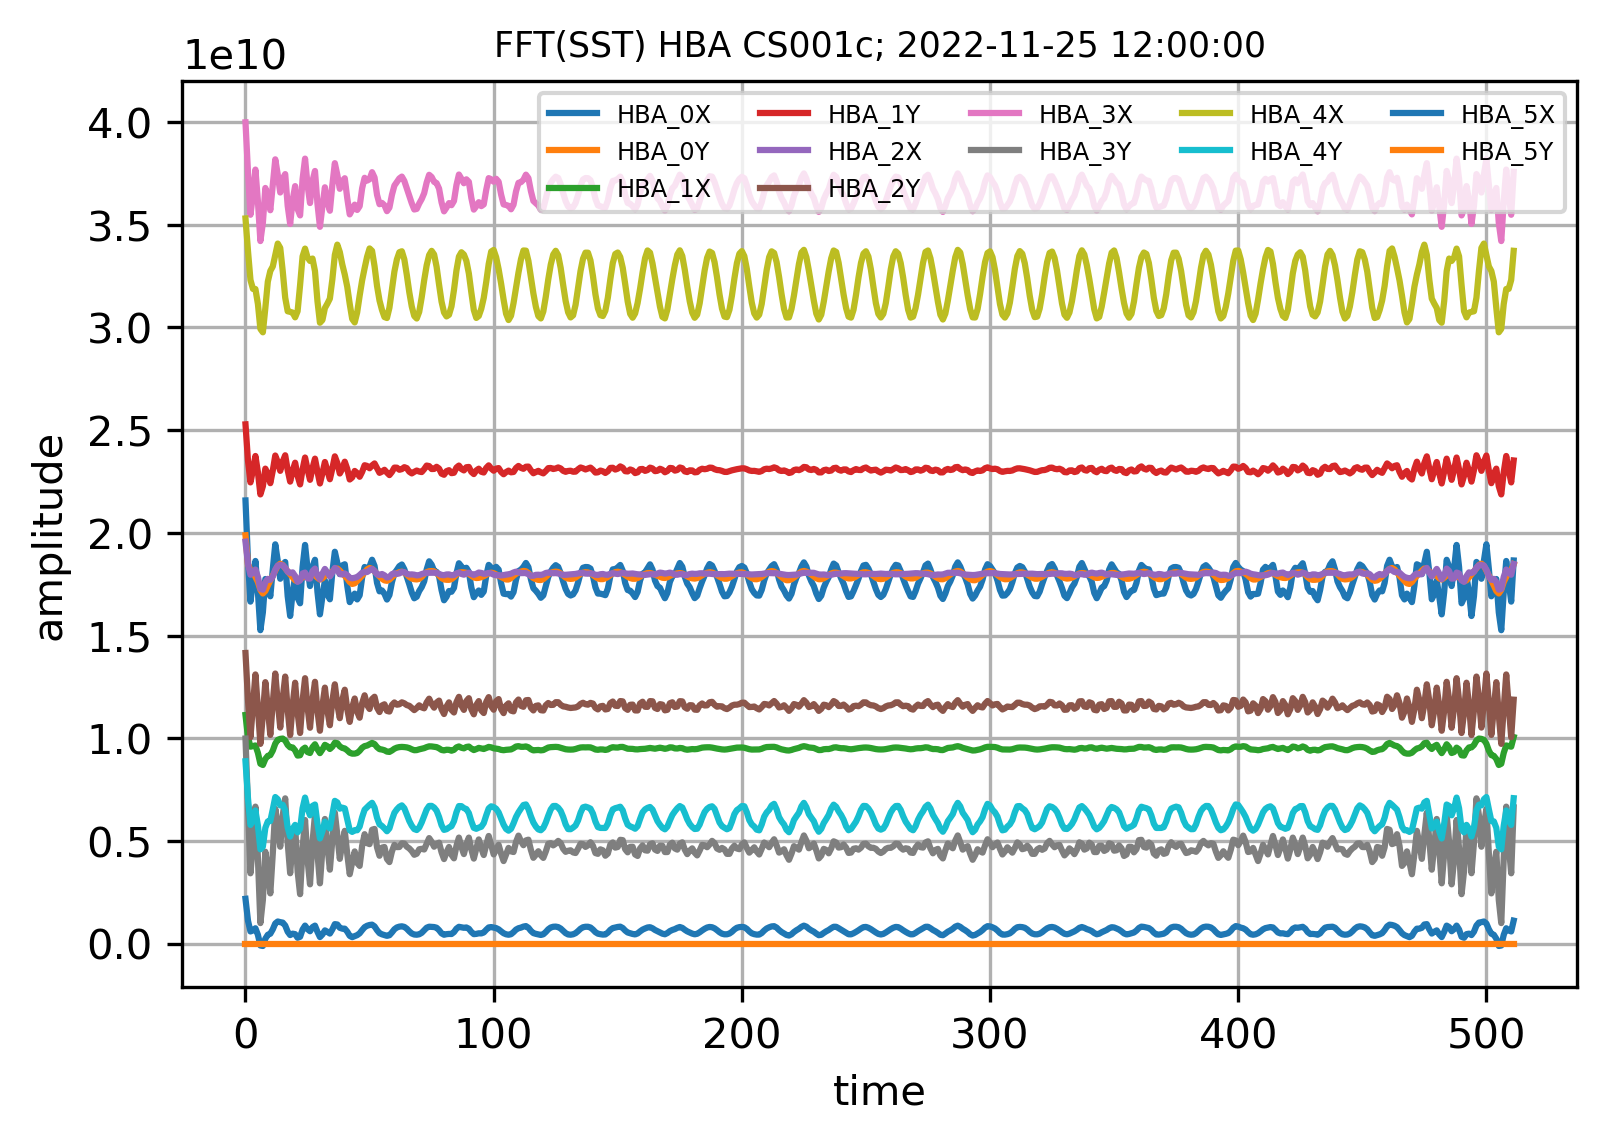

In [19]:
plt.figure(dpi=300)
FS=200
FFT_POINTS=512
si = 4
STATION_NAME='CS001c'
for cnt, f_si in enumerate(sst.D[1,:,:]):
    t_si = np.fft.fft(f_si)
    plt_label = sst.input_label[cnt]
    plt.plot(t_si, label = plt_label)
plt.grid()
plt.legend(fontsize='xx-small',ncol=5)
plt.xlabel("time")
plt.ylabel("amplitude")
plt.title(f"FFT(SST) HBA {STATION_NAME}; {START_TIME}", fontsize='small')
plt.show()

In [20]:
sky=np.load("../L2TS_cal/Sky2022-11-04-16-00-00_40.npy")
skyhour=np.arange(24*60/60)
print(sky.shape,len(skyhour))

(2, 96) 24


# OLD Plot subband over time

istart= 0 0.0


/tmp/ipykernel_26840/599731041.py:22: RuntimeWarning: divide by zero encountered in log10
  Pwr=(10*np.log10(sst.D[istart:istop,1::2,i]))-GainADC
/tmp/ipykernel_26840/599731041.py:23: RuntimeWarning: invalid value encountered in subtract
  Pwr-=np.mean(Pwr,axis=0)[np.newaxis,:]
/tmp/ipykernel_26840/599731041.py:22: RuntimeWarning: divide by zero encountered in log10
  Pwr=(10*np.log10(sst.D[istart:istop,1::2,i]))-GainADC
/tmp/ipykernel_26840/599731041.py:23: RuntimeWarning: invalid value encountered in subtract
  Pwr-=np.mean(Pwr,axis=0)[np.newaxis,:]
/tmp/ipykernel_26840/599731041.py:22: RuntimeWarning: divide by zero encountered in log10
  Pwr=(10*np.log10(sst.D[istart:istop,1::2,i]))-GainADC
/tmp/ipykernel_26840/599731041.py:23: RuntimeWarning: invalid value encountered in subtract
  Pwr-=np.mean(Pwr,axis=0)[np.newaxis,:]
/tmp/ipykernel_26840/599731041.py:22: RuntimeWarning: divide by zero encountered in log10
  Pwr=(10*np.log10(sst.D[istart:istop,1::2,i]))-GainADC
/tmp/ipykernel_26

(-1.0, 9.0)

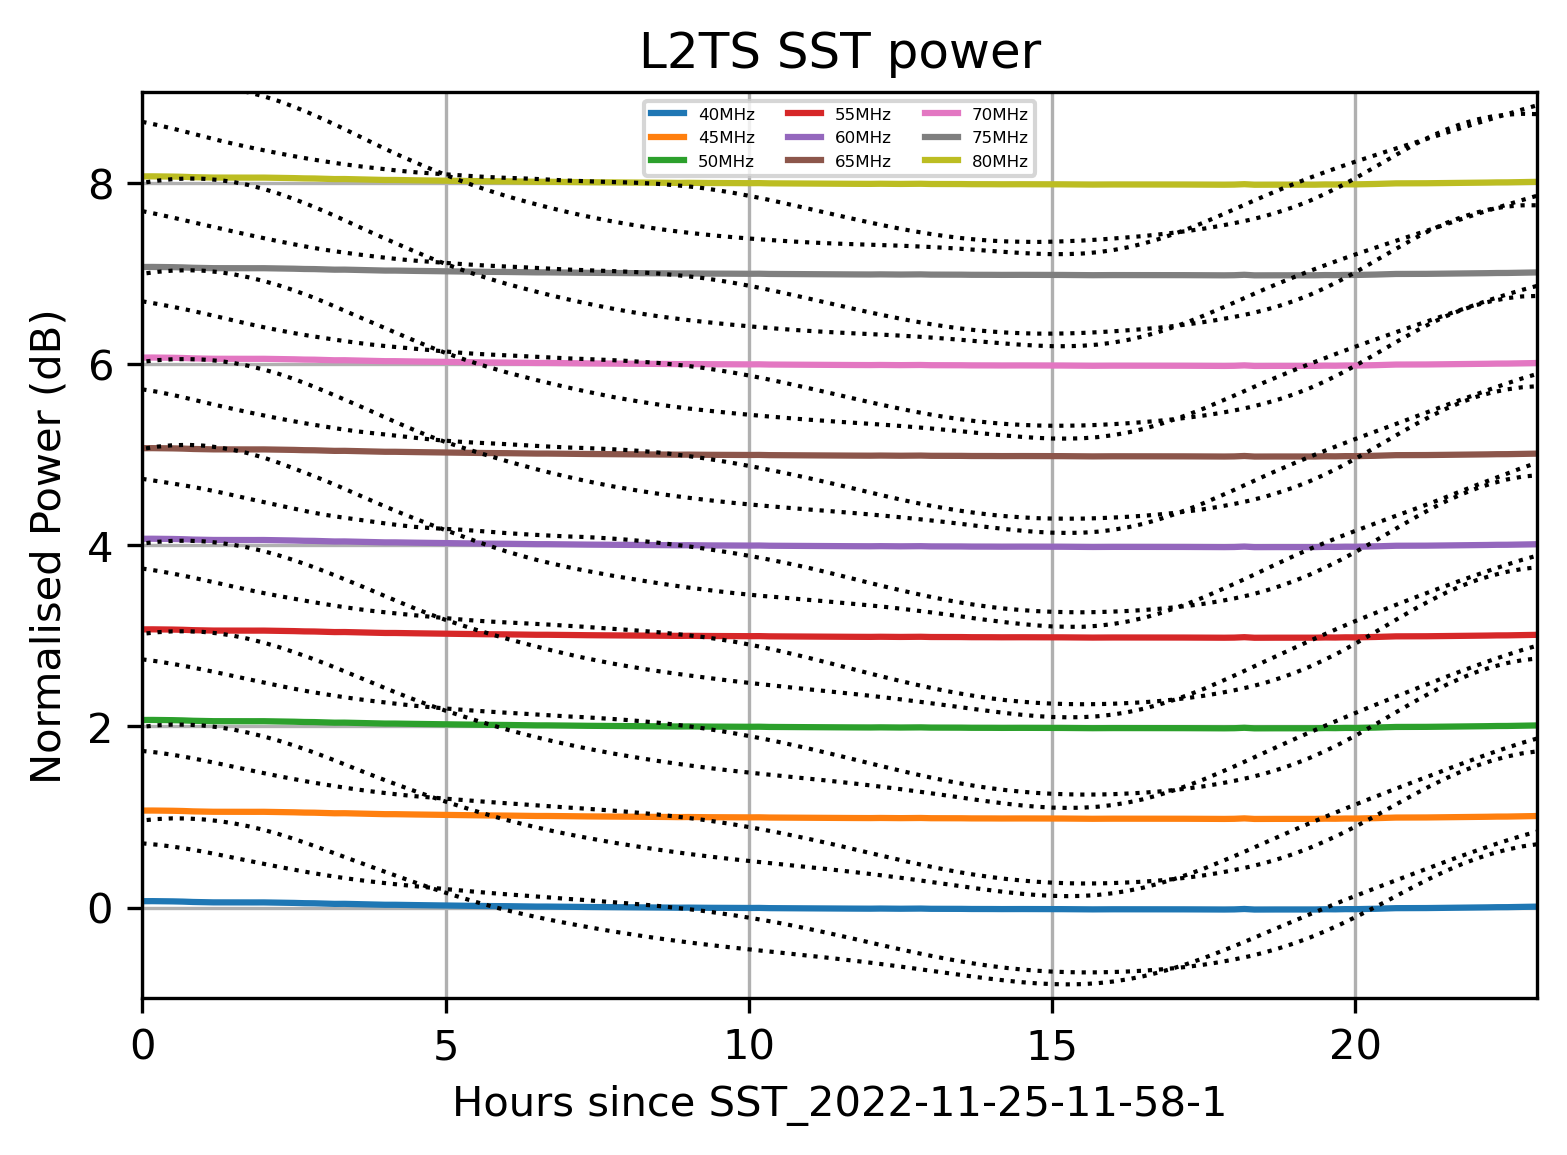

In [11]:
tsec = 10
plt.figure(dpi=300)
GainADC=(10*np.log10(100e6)+20*np.log10(2**12)) #XST to dBFS
hour_of_day=np.arange(sst.D.shape[0])/6+tsec/60/60
istart=0#20*360
istop=-1#int(21.6*360)
print("istart=",istart,istart/360)
for cnt,freq in enumerate(range(40,85,5)):
#for i in range(6):
    i=np.argmin(np.abs(freqs-freq))
#    Pwr=np.min(10*np.log10(sst.D[istart:istop,:,i]),axis=1)-GainADC
    Pwr=(10*np.log10(sst.D[istart:istop,::2,i]))-GainADC
    Pwr-=np.mean(Pwr,axis=0)[np.newaxis,:]
    Pwr=np.percentile(Pwr,50,axis=1)
    plt.plot(hour_of_day[istart:istop],Pwr+cnt,label='%iMHz'%freq);
#    print(i,np.max(Pwr),istart+np.argmax(Pwr),(istart+np.argmax(Pwr))/360)
plt.gca().set_prop_cycle(None)
for cnt,freq in enumerate(range(40,85,5)):
#for i in range(6):
    i=np.argmin(np.abs(freqs-freq))
#    Pwr=np.min(10*np.log10(sst.D[istart:istop,:,i]),axis=1)-GainADC
    Pwr=(10*np.log10(sst.D[istart:istop,1::2,i]))-GainADC
    Pwr-=np.mean(Pwr,axis=0)[np.newaxis,:]
    Pwr=np.percentile(Pwr,50,axis=1)
    plt.plot(hour_of_day[istart:istop],Pwr+cnt,'--');


skyhour=np.arange(25*60/15)/4
for cnt,freq in enumerate(range(40,85,5)):
    sky=np.load("../L2TS_cal/Sky2022-11-04-15-00-00_%iMHz.npy"%freq)
    skyP=10*np.log10(sky[0,:])
    skyP-=np.mean(skyP)
    plt.plot(skyhour,skyP.T+cnt,'k:',linewidth=1)

    skyP=10*np.log10(sky[1,:])
    skyP-=np.mean(skyP)
    plt.plot(skyhour-1,skyP.T+cnt,'k:',linewidth=1)
plt.ylabel('Normalised Power (dB)')
plt.legend(fontsize=4,ncol=3)
plt.xlabel('Hours since ' + sst.files[0][4:-4])
plt.title("L2TS SST power")
plt.grid()
plt.xlim(0,23)
plt.ylim(-1,9)

istart= 0 0.0


/tmp/ipykernel_26840/1882544199.py:11: RuntimeWarning: divide by zero encountered in log10
  Pwr=(10*np.log10(sst.D[istart:istop,1::2,i]))-GainADC
/tmp/ipykernel_26840/1882544199.py:12: RuntimeWarning: invalid value encountered in subtract
  Pwr-=np.mean(Pwr,axis=0)[np.newaxis,:]
/tmp/ipykernel_26840/1882544199.py:11: RuntimeWarning: divide by zero encountered in log10
  Pwr=(10*np.log10(sst.D[istart:istop,1::2,i]))-GainADC
/tmp/ipykernel_26840/1882544199.py:12: RuntimeWarning: invalid value encountered in subtract
  Pwr-=np.mean(Pwr,axis=0)[np.newaxis,:]
/tmp/ipykernel_26840/1882544199.py:11: RuntimeWarning: divide by zero encountered in log10
  Pwr=(10*np.log10(sst.D[istart:istop,1::2,i]))-GainADC
/tmp/ipykernel_26840/1882544199.py:12: RuntimeWarning: invalid value encountered in subtract
  Pwr-=np.mean(Pwr,axis=0)[np.newaxis,:]
/tmp/ipykernel_26840/1882544199.py:11: RuntimeWarning: divide by zero encountered in log10
  Pwr=(10*np.log10(sst.D[istart:istop,1::2,i]))-GainADC
/tmp/ipyke

(-1.0, 9.0)

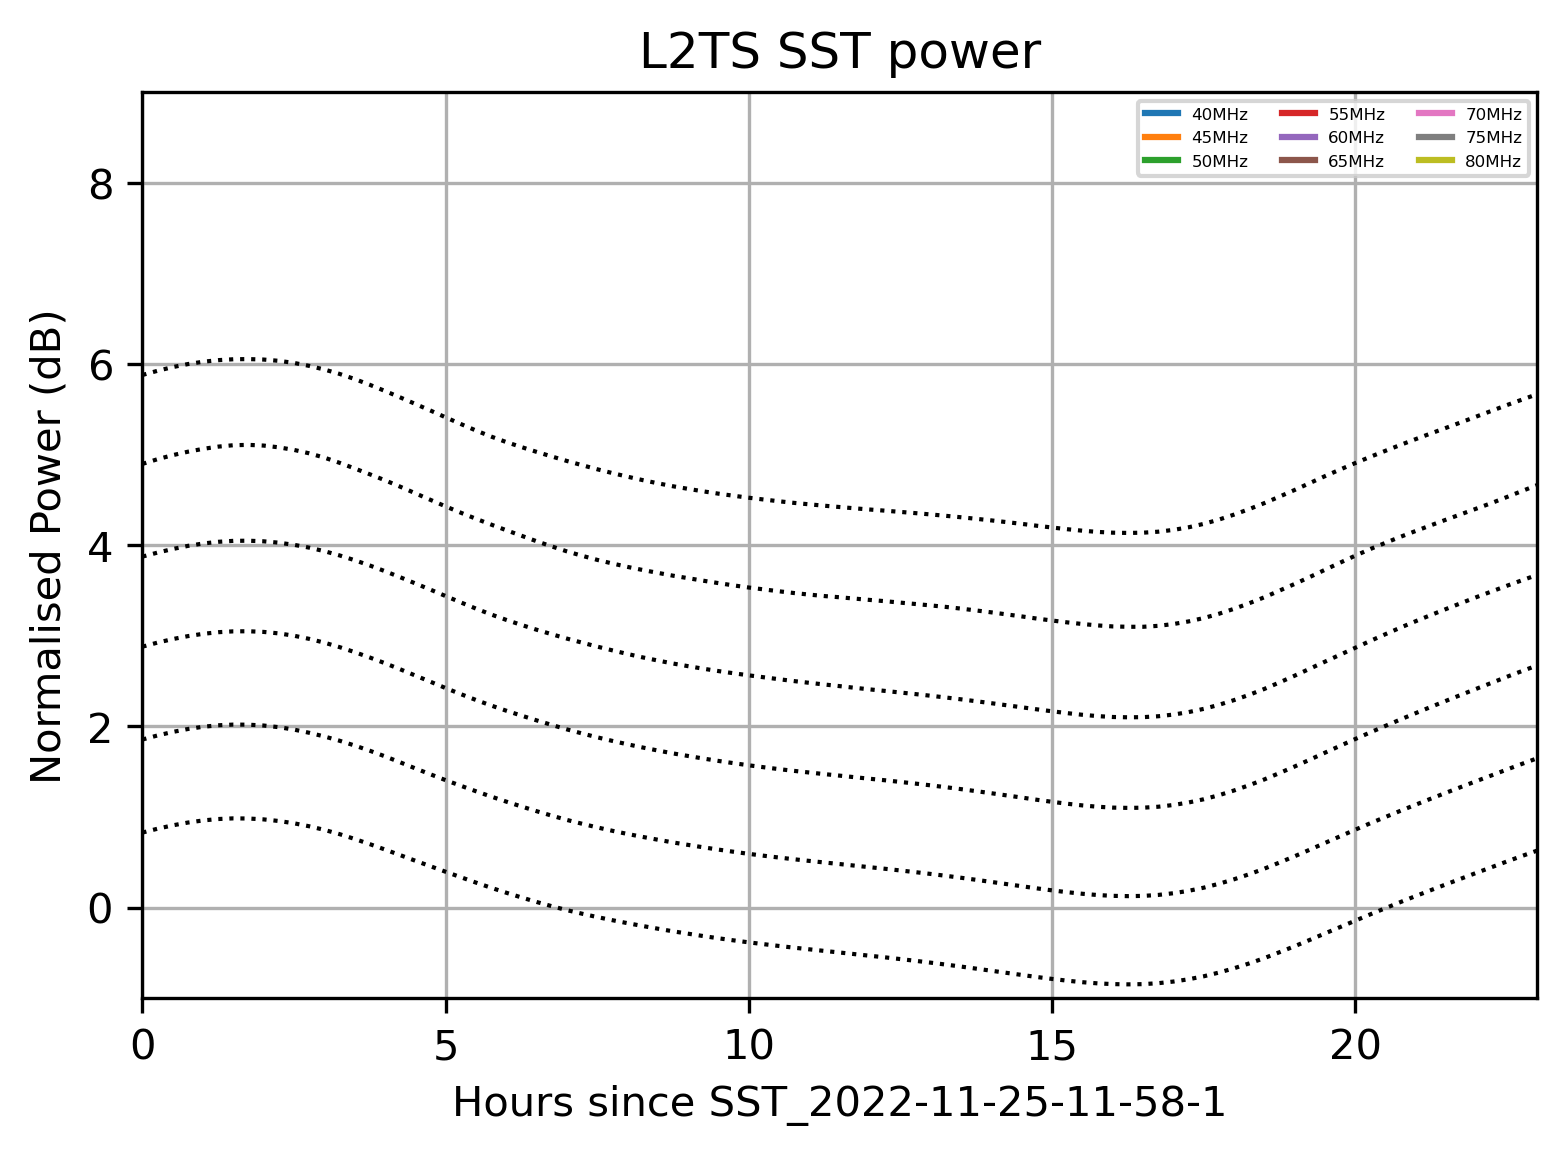

In [12]:
plt.figure(dpi=300)
GainADC=(10*np.log10(100e6)+20*np.log10(2**12)) #XST to dBFS
hour_of_day=np.arange(sst.D.shape[0])/6+tsec/60/60
istart=0#20*360
istop=-1#int(21.6*360)
print("istart=",istart,istart/360)
for cnt,freq in enumerate(range(40,85,5)):
#for i in range(6):
    i=np.argmin(np.abs(freqs-freq))
#    Pwr=np.min(10*np.log10(sst.D[istart:istop,:,i]),axis=1)-GainADC
    Pwr=(10*np.log10(sst.D[istart:istop,1::2,i]))-GainADC
    Pwr-=np.mean(Pwr,axis=0)[np.newaxis,:]
    Pwr=np.percentile(Pwr,50,axis=1)
    plt.plot(hour_of_day[istart:istop],Pwr+cnt,label='%iMHz'%freq);
#    print(i,np.max(Pwr),istart+np.argmax(Pwr),(istart+np.argmax(Pwr))/360)
skyhour=np.arange(25*60/15)/4
for cnt,freq in enumerate(range(40,70,5)):
    sky=np.load("../L2TS_cal/Sky2022-11-04-15-00-00_%iMHz.npy"%freq)
    skyP=10*np.log10(sky[1,:])
    skyP-=np.mean(skyP)
    plt.plot(skyhour,skyP.T+cnt,'k:',linewidth=1)
plt.ylabel('Normalised Power (dB)')
plt.legend(fontsize=4,ncol=3)
plt.xlabel('Hours since ' + sst.files[0][4:-4])
plt.title("L2TS SST power")
plt.grid()
plt.xlim(0,23)
plt.ylim(-1,9)

In [13]:
skyD=np.load("../L2TS_cal/SkyPwrFreq2022-10-21-15-00-00.npz")

In [14]:
plt.figure(dpi=300)
ihour=np.argmin(np.abs(hour_of_day-15))
print(hour_of_day[ihour])
Pwr=(10*np.log10(D[ihour,1::2,:]))-GainADC
plt.plot(freqs,Pwr.T);
#plt.plot(skyD['freq'],10*np.log10(skyD['pwr'])-170,'k-')
plt.grid()
plt.xlabel("Frequency MHz")
plt.ylabel("Power dB")
plt.xlim([100,200])

15.002777777777778


NameError: name 'D' is not defined

<Figure size 1800x1200 with 0 Axes>

In [15]:
if False:
    plt.figure(dpi=300)
    skyP=10*np.log10(sky[:,1])
    skyP-=np.mean(skyP,axis=1)[:,np.newaxis]
    plt.plot(skyhour,skyP.T,'-')
    plt.ylabel('Power (dBFS)')
    plt.legend(fontsize='small',ncol=2)
    plt.xlabel('Hour of day (%s)'%SSTdate)
    plt.grid()

Text(0.5, 1.0, ' Spectrogam of HBA input nr HBA_2Y')

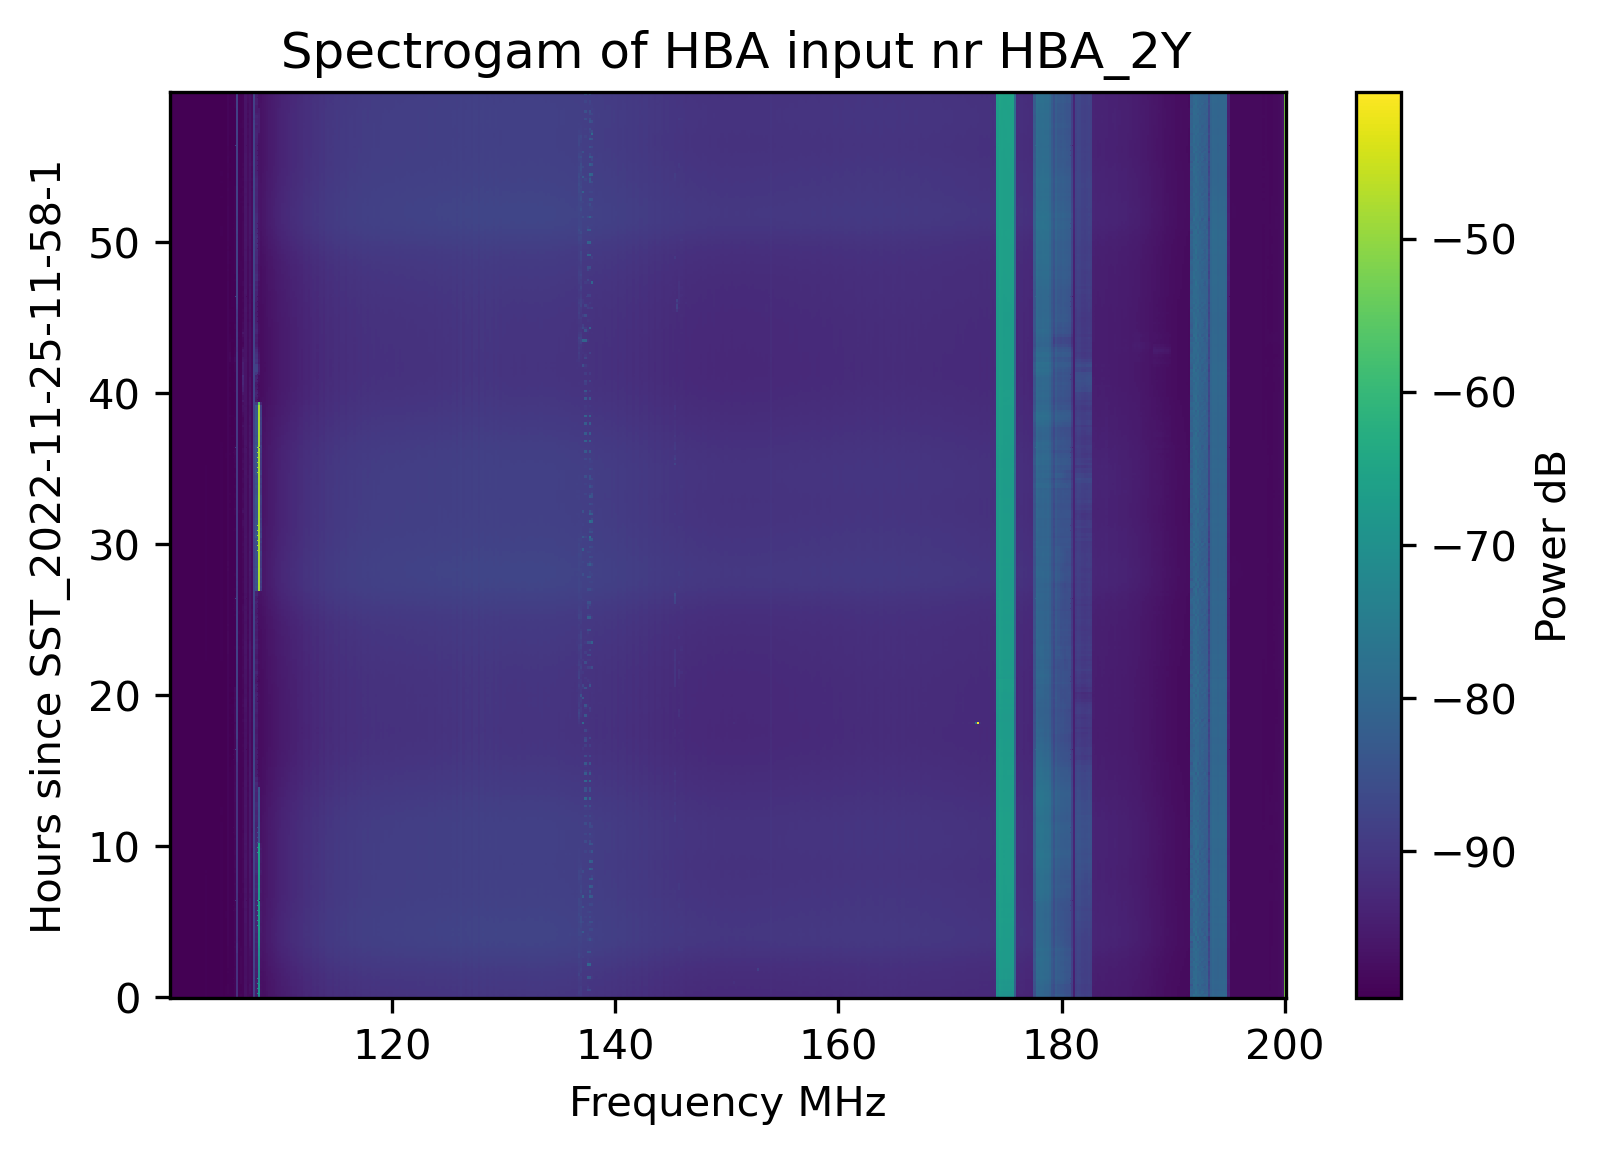

In [16]:
plt.figure(dpi=300)
#plt.imshow(10*np.log10(D[:,1,:])-GainADC,vmin=-80,vmax=-60)
yas = hour_of_day #range(len(D[:,1,1]))
plt.pcolor(sst.freqs, yas, 10*np.log10(sst.D[:,(hba_si_nr),:])-GainADC) #,vmin=-80,vmax=-60)
plt.colorbar(label = 'Power dB')
plt.xlabel('Frequency MHz')
plt.ylabel('Hours since ' + sst.files[0][4:-4])
plt.title(f" Spectrogam of HBA input nr {sst.input_label[hba_si_nr]}")
#plt.savefig("./results/sst_lba_waterval.png")

TypeError: 'list' object is not callable

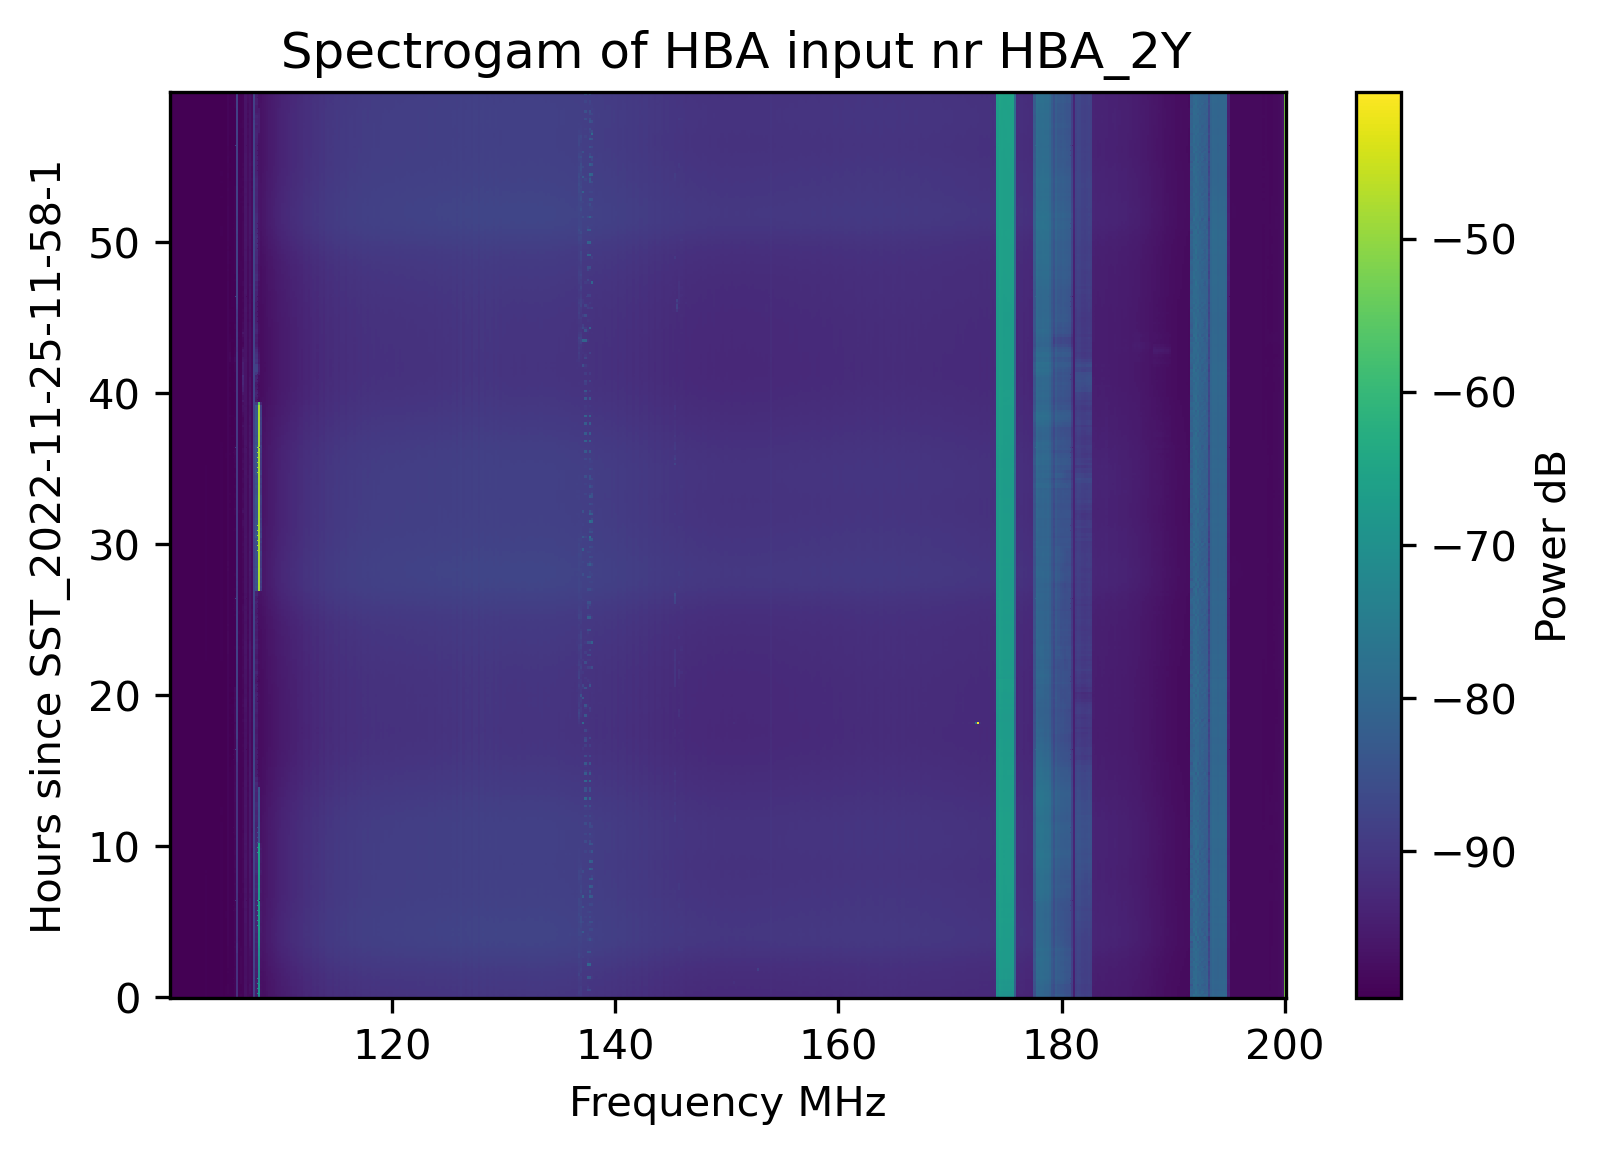

In [17]:
plt.figure(dpi=300)
#plt.imshow(10*np.log10(D[:,1,:])-GainADC,vmin=-80,vmax=-60)
yas = hour_of_day #range(len(D[:,1,1]))
plt.pcolor(freqs, yas, 10*np.log10(sst.D[:,(hba_si_nr),:])-GainADC) #,vmin=-80,vmax=-60)
plt.colorbar(label = 'Power dB')
plt.xlabel('Frequency MHz')
plt.ylabel('Hours since ' + sst.files[0][4:-4])
plt.title(f" Spectrogam of HBA input nr {sst.input_label[hba_si_nr]}")
plt.clim([-100, -80])
#plt.savefig("./results/sst_lba_waterval.png")

Text(0.5, 1.0, '5 avaraged time slices of HBA_2Y from 2022-11-25 12:00:00')

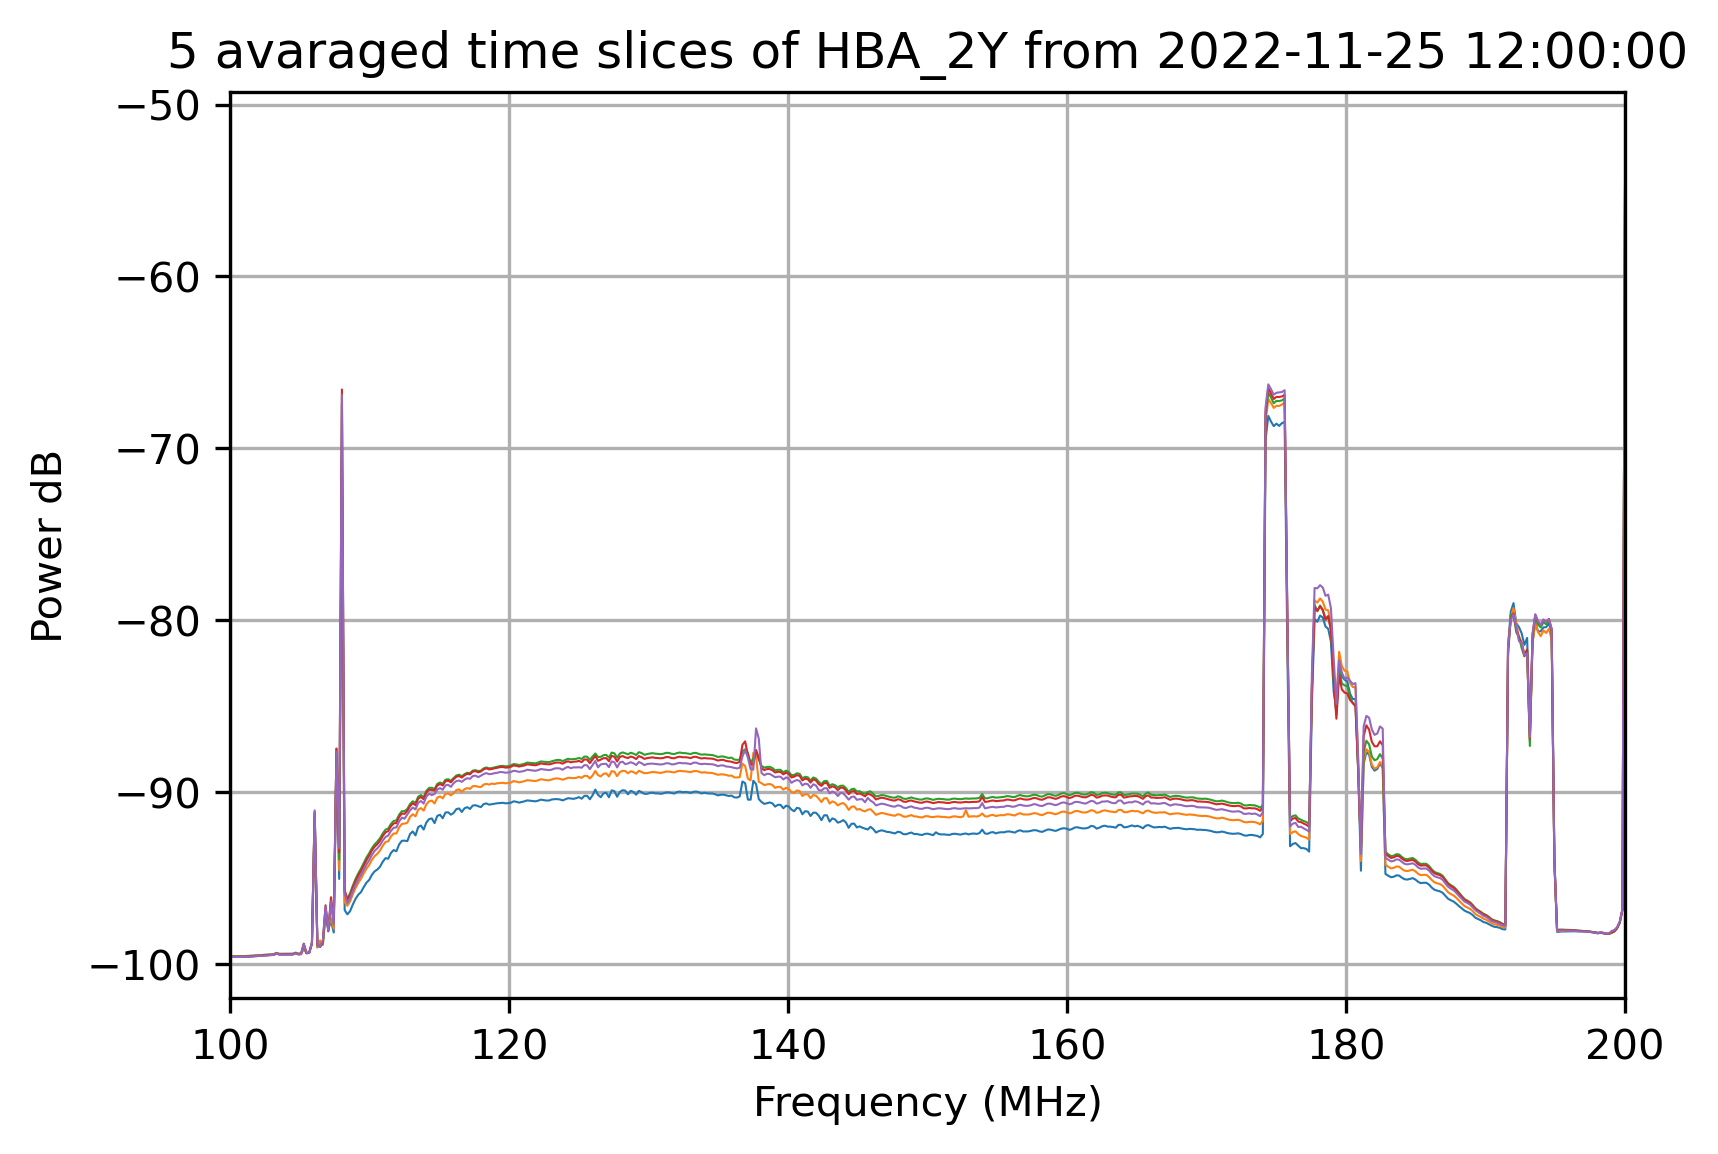

In [32]:
slices=5
pwr3=10*np.log10(sst.D[:,(hba_si_nr),:])-GainADC
plt.figure(dpi=300)
for x in range(slices):
    plt.plot(freqs, np.mean(pwr3[(x*10+0):(x*10+10)],axis=0),linewidth=0.5)
plt.grid()
plt.xlabel("Frequency (MHz)")
plt.ylabel("Power dB")
plt.xlim([100,200])
plt.title(f'{slices} avaraged time slices of {sst.input_label[hba_si_nr]} from {START_TIME}')

# Debug code

In [ ]:

D3=[]
flist=[]
for f in files[:4]:
  print(f)
  D2=np.load(fpath+'/'+f)[:,:18,:]
  ns=D2.shape
#  print(ns)
  if ns[0]!=3600: continue;
  D2=D2.reshape(ns[0]//10,10,ns[1],ns[2])
  D2=np.percentile(D2,50,axis=1)
  D3.append(D2)
  flist.append(f)
  print("    ",D3[-1].shape)
D3=np.array(D3)
print(D3.shape)
ns=D3.shape
D3=D3.reshape([ns[0]*ns[1],ns[2],ns[3]])
print(D3.shape)


In [ ]:
plt.figure(dpi=300)
pwr3=10*np.log10(D3[:,1,:])-GainADC
plt.imshow(pwr3,vmin=-80,vmax=-60)
plt.colorbar()

In [ ]:
plt.figure(dpi=300)
for x in range(14):
    plt.plot(freqs,np.mean(pwr3[(x*100+0):(x*100+100)],axis=0),linewidth=0.5)
#plt.ylim(-90,-70)
plt.xlim(130,150)
plt.xlabel("Frequency (MHz)")
plt.ylabel("Power (dBFS)")
plt.title("SST spectrum changing over time")
plt.grid()

In [ ]:
P4=10*np.log10(D[:,::,i3])-GainADC
plt.plot(P4)
#plt.ylim(-76,-68)
#plt.xlim(500,1000)
plt.ylabel("Power (dBFS)")
plt.xlabel("Time step (10s)")
plt.title("SST (70MHz)")
plt.grid()

In [ ]:
plt.figure(dpi=300)
for i in [i2]:
    Pwr=(10*np.log10(D[istart:istop,1::2,i]))-GainADC
    Pwr-=np.mean(Pwr,axis=0)[np.newaxis,:]
    for l in range(6):
        plt.plot(hour_of_day[istart:istop],Pwr[:,l],label='Y%i'%l);
    print(i,np.max(Pwr),istart+np.argmax(Pwr),(istart+np.argmax(Pwr))/360)
plt.ylabel('Normalised Power (dB)')
plt.legend(fontsize='small',ncol=4)
plt.xlabel('Hours since ' + files[0][4:-4])
plt.title("L2TS SST power (160 MHz)")
plt.xlim([15,25])
plt.grid()

In [ ]:
print([i2])